In [2]:
# !pip install xgboost

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier  
from sklearn.ensemble import StackingClassifier

In [4]:
df = pd.read_csv(r'PCOS_data.csv')

In [5]:
df

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0        152.000  19.3           15                78                22  ...   
1        161.500  24.9           15                74                20  ...   
2        165.000  25.3           11                72                18  ...   
3        148.000  29.7           13                72                20  ...   
4        161.000  20.1           11                72                18  ...   
..           ...   ...          ...               ...               ...  ...   
536      164.592  18.5           17                72                16  ...   
537      158.000  25.3           15                72                18  ...   
538      152.000  23.4           13                74                20  ...   
539      150.000  22.2           15                74                20  ...   
540      165.000  30.1           13                80                20  ...   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0                1.0                  0                  110   
1                0.0                  0                  120   
2                1.0                  0                  120   
3                0.0                  0                  120   
4                0.0                  0                  120   
..               ...                ...                  ...   
536              0.0                  0                  110   
537              0.0                  0                  110   
538              0.0                  0                  110   
539              0.0                  0                  110   
540              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
2                      80                13                15   
3                      70                 2                 2   
4                      80                 3                 4   
..                    ...               ...               ...   
536                    70                 1                 0   
537                    70                 9                 7   
538                    80                 1                 0   
539                    70                 7                 6   
540                    70                 9                10   

     Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                    18.0                 18.0               8.5          NaN  
1                    15.0                 14.0               3.7          NaN  
2                    18.0                 20.0              10.0          NaN  
3                    15.0                 14.0               7.5          NaN  
4                    16.0                 14.0               7.0          NaN  
..                    ...                  ...               ...          ...  
536                  17.5                 10.0               6.7          NaN  
537          

In [6]:
df.isnull().sum().sum()

541

In [7]:
df.shape

(541, 45)

In [8]:
df.drop(['Unnamed: 44'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [10]:
df.drop(["Sl. No","Patient File No.","II    beta-HCG(mIU/mL)","AMH(ng/mL)"],axis = 1,inplace = True)

In [11]:
df["Marraige Status (Yrs)"].fillna(df['Marraige Status (Yrs)'].describe().loc[['50%']][0], inplace = True) 

In [12]:
df["Fast food (Y/N)"].fillna(1, inplace = True)

In [13]:
df['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [14]:
print("PCOS dataset:\n",df.shape[0],"Records\n",df.shape[1],"Features")

PCOS dataset:
 541 Records
 40 Features


In [15]:
df.shape

(541, 40)

In [16]:
df.rename(columns = {'PCOS (Y/N)':'PCOS','Age (yrs)':'Age','Weight (Kg)':'Weight','Height(Cm)':'Height','Pulse rate(bpm)':'Pulse rate','Hb(g/dl)':'Hb','Cycle(R/I)':'Cycle','Cycle length(days)':'Cycle length','Marraige Status (Yrs)':'Marraige Status','Pregnant(Y/N)':'Pregnant',
'FSH(mIU/mL)':'FSH'}, inplace = True)

In [17]:
df.columns

Index(['PCOS', ' Age (yrs)', 'Weight', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb', 'Cycle', 'Cycle length',
       'Marraige Status', 'Pregnant', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'FSH', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
       'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [18]:
df

PCOS   Age (yrs)  Weight  Height(Cm)    BMI  Blood Group  \
0       0          28    44.6      152.000  19.3           15   
1       0          36    65.0      161.500  24.9           15   
2       1          33    68.8      165.000  25.3           11   
3       0          37    65.0      148.000  29.7           13   
4       0          25    52.0      161.000  20.1           11   
..    ...         ...     ...          ...   ...          ...   
536     0          35    50.0      164.592  18.5           17   
537     0          30    63.2      158.000  25.3           15   
538     0          36    54.0      152.000  23.4           13   
539     0          27    50.0      150.000  22.2           15   
540     1          23    82.0      165.000  30.1           13   

     Pulse rate(bpm)   RR (breaths/min)     Hb  Cycle  ...  Pimples(Y/N)  \
0                  78                22  10.48      2  ...             0   
1                  74                20  11.70      2  ...             0   
2                  72                18  11.80      2  ...             1   
3                  72                20  12.00      2  ...             0   
4                  72                18  10.00      2  ...             0   
..                ...               ...    ...    ...  ...           ...   
536                72                16  11.00      2  ...             0   
537                72                18  10.80      2  ...             0   
538                74                20  10.80      2  ...             0   
539                74                20  12.00      4  ...             1   
540                80                20  10.20      4  ...             1   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0                1.0                  0                  110   
1                0.0                  0                  120   
2                1.0                  0                  120   
3                0.0                  0                  120   
4                0.0                  0                  120   
..               ...                ...                  ...   
536              0.0                  0                  110   
537              0.0                  0                  110   
538              0.0                  0                  110   
539              0.0                  0                  110   
540              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
2                      80                13                15   
3                      70                 2                 2   
4                      80                 3                 4   
..                    ...               ...               ...   
536                    70                 1                 0   
537                    70                 9                 7   
538                    80                 1                 0   
539                    70                 7                 6   
540                    70                 9                10   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                    18.0                  18.0               8.5  
1                    15.0                  14.0               3.7  
2                    18.0                  20.0              10.0  
3                    15.0                  14.0               7.5  
4                    16.0                  14.0               7.0  
..                    ...                   ...               ...  
536                  17.5                  10.0               6.7  
537                  19.0                  18.0               8.2  
538                  18.0                   9.0               7.3  
539                  18.0                  16.0              11.5  
540          

In [19]:
x = df.drop(['PCOS'],axis=1)
y = df['PCOS']

In [20]:
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS, Length: 541, dtype: int64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=72)

In [23]:
x_train

Age (yrs)  Weight  Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   \
332          27    59.0      158.000  23.6           15                72   
435          30    64.0      170.000  22.1           15                72   
91           35    45.0      150.000  20.0           15                74   
489          28    63.0      143.000  30.8           11                72   
388          31    55.5      151.000  24.3           15                74   
..          ...     ...          ...   ...          ...               ...   
282          38    62.0      154.000  26.1           15                74   
207          32    60.0      145.000  28.5           15                73   
74           35    59.0      152.000  25.5           13                72   
46           28    75.0      165.000  27.5           15                72   
472          26    68.0      164.592  25.1           11                72   

     RR (breaths/min)    Hb  Cycle  Cycle length  ...  Pimples(Y/N)  \
332                18  10.0      2             6  ...             1   
435                18  11.1      2             5  ...             1   
91                 20  11.8      2             5  ...             0   
489                18  11.8      2             4  ...             0   
388                18  11.1      2             5  ...             1   
..                ...   ...    ...           ...  ...           ...   
282                20  10.5      4             4  ...             1   
207                18  11.2      4             5  ...             1   
74                 20  11.1      4            12  ...             0   
46                 18  12.0      2             5  ...             1   
472                18  12.0      2             5  ...             1   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
332              0.0                  0                  110   
435              0.0                  1                  110   
91               0.0                  0                  120   
489              0.0                  0                  120   
388              1.0                  1                  110   
..               ...                ...                  ...   
282              1.0                  0                  120   
207              0.0                  0                  120   
74               0.0                  0                  120   
46               1.0                  0                  110   
472              1.0                  0                  110   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
332                    70                 3                 3   
435                    80                 4                 3   
91                     80                 7                 5   
489                    80                 7                15   
388                    80                 6                 7   
..                    ...               ...               ...   
282                    80                 8                 5   
207                    80                 3                 4   
74                     80                 2                 3   
46                     70                 4                 6   
472                    70                12                14   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
332                  14.0                  12.0             10.50  
435                  11.0                  16.0              9.00  
91                   20.0                  18.0              5.70  
489                  16.0                  16.0             10.00  
388                  18.0                  12.0              9.00  
..                    ...                   ...               ...  
282                  15.0                  17.0              9.80  
207                  14.0                  12.0              7.50  
74                    9.5                   6.2              8.70 

In [58]:
rf = RandomForestClassifier(ccp_alpha=0.01)
rf.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.01)

In [59]:
rfp = rf.predict(x_test)

In [60]:
rfa = accuracy_score(y_test,rfp)
rfa

0.8650306748466258

In [29]:
rfc = classification_report(y_test,rfp)
print(rfa)

0.8895705521472392


In [39]:
dt = DecisionTreeClassifier(ccp_alpha=0.1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.1)

In [40]:
dtp = dt.predict(x_test)

In [41]:
dta = accuracy_score(y_test,dtp)
dta

0.8220858895705522

In [42]:
dtc = classification_report(y_test,dtp)
print(dtc)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        99
           1       0.89      0.62      0.73        64

    accuracy                           0.82       163
   macro avg       0.84      0.79      0.80       163
weighted avg       0.83      0.82      0.81       163



In [43]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [44]:
abp = ab.predict(x_test)

In [45]:
aba = accuracy_score(y_test,abp)
aba

0.8650306748466258

In [46]:
abc = classification_report(y_test,abp)
print(abc)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        99
           1       0.92      0.72      0.81        64

    accuracy                           0.87       163
   macro avg       0.88      0.84      0.85       163
weighted avg       0.87      0.87      0.86       163



In [47]:
xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [48]:
xgp = xg.predict(x_test)

In [49]:
xga = accuracy_score(y_test,xgp)
xga

0.8895705521472392

In [56]:
# !pip install mlxtend

In [53]:
from mlxtend.classifier import StackingClassifier

In [54]:
model1 = RandomForestClassifier()
model2 = XGBClassifier()

lr = AdaBoostClassifier()
clf_stack = StackingClassifier(classifiers=[model1, model2], meta_classifier=lr, use_probas=True,
                                               use_features_in_secondary=True)
model_stack = clf_stack.fit(x_train, y_train)
pred_stack = model_stack.predict(x_test)
acc_stack = accuracy_score(y_test, pred_stack)
acc_stack

0.8957055214723927

In [55]:
Hybrid  = classification_report(y_test, pred_stack)
print(Hybrid)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.89      0.84      0.86        64

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [61]:
graph = pd.DataFrame({'Models':['RandomForestClassifier','DecisionTreeClassifier','AdaBoost','XGBClassifier','StackingClassifier'],'Accuracy':[rfa*100,dta*100,aba*100,xga*100,acc_stack*100]})
graph

Models   Accuracy
0  RandomForestClassifier  86.503067
1  DecisionTreeClassifier  82.208589
2                AdaBoost  86.503067
3           XGBClassifier  88.957055
4      StackingClassifier  89.570552

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

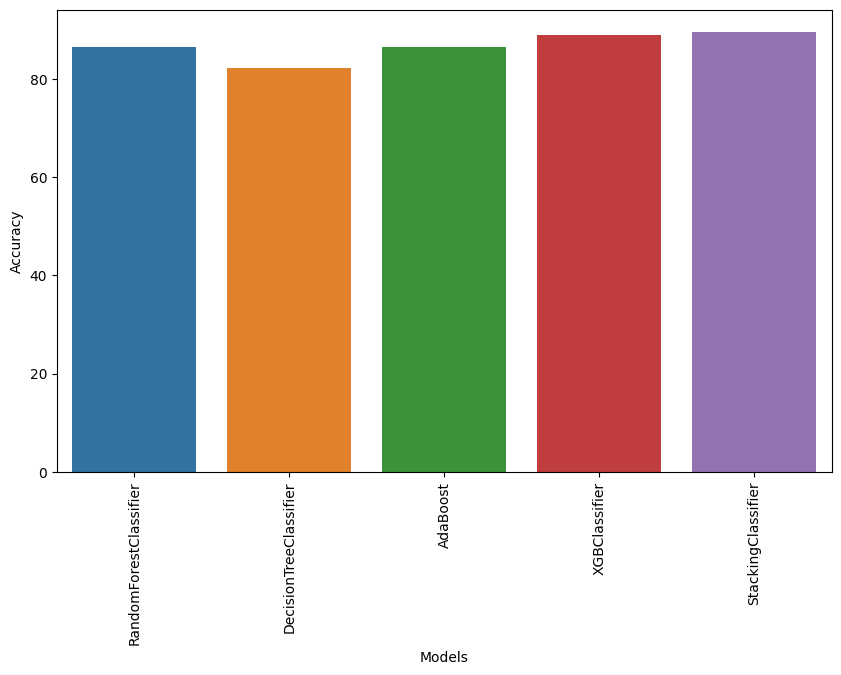

In [64]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

In [71]:
df[df['PCOS']==0]

PCOS   Age (yrs)  Weight  Height(Cm)    BMI  Blood Group  \
0       0          28    44.6      152.000  19.3           15   
1       0          36    65.0      161.500  24.9           15   
3       0          37    65.0      148.000  29.7           13   
4       0          25    52.0      161.000  20.1           11   
5       0          36    74.1      165.000  27.2           15   
..    ...         ...     ...          ...   ...          ...   
535     0          26    80.0      161.544  30.7           18   
536     0          35    50.0      164.592  18.5           17   
537     0          30    63.2      158.000  25.3           15   
538     0          36    54.0      152.000  23.4           13   
539     0          27    50.0      150.000  22.2           15   

     Pulse rate(bpm)   RR (breaths/min)     Hb  Cycle  ...  Pimples(Y/N)  \
0                  78                22  10.48      2  ...             0   
1                  74                20  11.70      2  ...             0   
3                  72                20  12.00      2  ...             0   
4                  72                18  10.00      2  ...             0   
5                  78                28  11.20      2  ...             0   
..                ...               ...    ...    ...  ...           ...   
535                70                18  10.60      2  ...             0   
536                72                16  11.00      2  ...             0   
537                72                18  10.80      2  ...             0   
538                74                20  10.80      2  ...             0   
539                74                20  12.00      4  ...             1   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0                1.0                  0                  110   
1                0.0                  0                  120   
3                0.0                  0                  120   
4                0.0                  0                  120   
5                0.0                  0                  110   
..               ...                ...                  ...   
535              0.0                  0                  110   
536              0.0                  0                  110   
537              0.0                  0                  110   
538              0.0                  0                  110   
539              0.0                  0                  110   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
3                      70                 2                 2   
4                      80                 3                 4   
5                      70                 9                 6   
..                    ...               ...               ...   
535                    80                 7                 9   
536                    70                 1                 0   
537                    70                 9                 7   
538                    80                 1                 0   
539                    70                 7                 6   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                    18.0                  18.0               8.5  
1                    15.0                  14.0               3.7  
3                    15.0                  14.0               7.5  
4                    16.0                  14.0               7.0  
5                    16.0                  20.0               8.0  
..                    ...                   ...               ...  
535                  13.0                  17.5               9.6  
536                  17.5                  10.0               6.7  
537                  19.0                  18.0               8.2  
538                  18.0                   9.0               7.3  
539          

In [69]:
pred = [[33,68.8,165.000,25.3,11,72,18,11.8,2,2,5,7,0,0,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92,0,0,0,0,1,1.0,0,120,80,13,15,18.0]]

In [70]:
result = rf.predict(pred)
result

C:\Users\YMTS0420\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [72]:
x_train.shape

(378, 39)